In [20]:
import JLD2
import Makie
import CairoMakie
using CudaRBMs: gpu, cpu
using Random: bitrand
using RestrictedBoltzmannMachines: RBM, sample_v_from_v
using StandardizedRestrictedBoltzmannMachines: standardize
using Statistics: mean, cov
using MLDatasets: MNIST
using Images: Gray, gray
using MosaicViews: mosaicview

In [11]:
train_data = MNIST(:train).features .> 0.5;

In [5]:
rbm = JLD2.load("rbm.jld2", "rbm");

In [6]:
samples_v = sample_v_from_v(gpu(rbm), gpu(bitrand(28, 28, 1000)); steps=10000);

In [8]:
size(samples_v)

(28, 28, 1000)

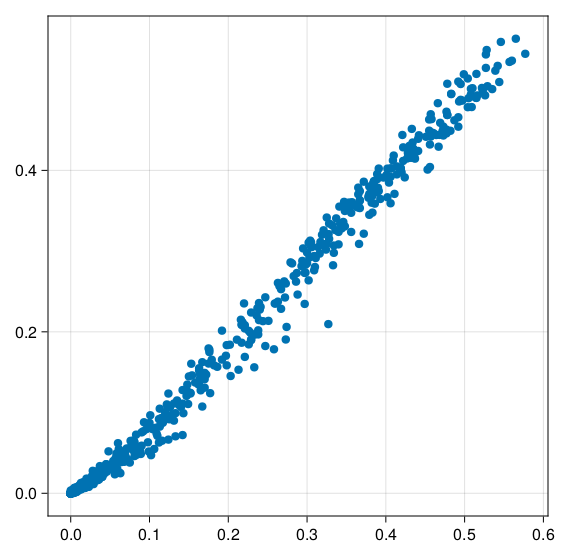

In [12]:
fig = Makie.Figure()
ax = Makie.Axis(fig[1,1], width=500, height=500)
Makie.scatter!(vec(mean(cpu(samples_v); dims=3)), vec(mean(train_data; dims=3)))
Makie.resize_to_layout!(fig)
fig

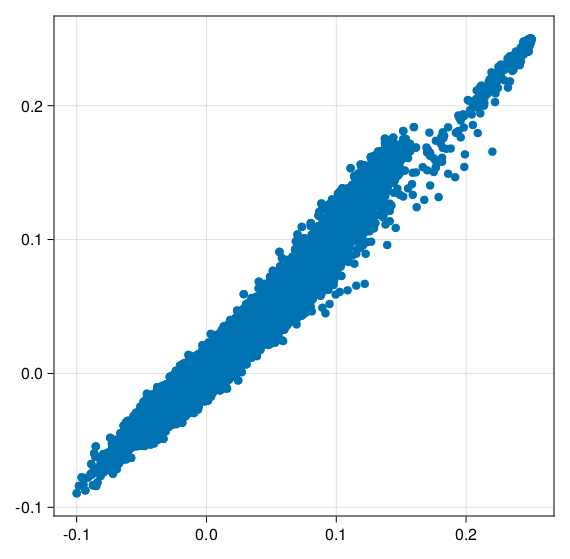

In [15]:
fig = Makie.Figure()
ax = Makie.Axis(fig[1,1], width=500, height=500)
Makie.scatter!(
    vec(cov(reshape(cpu(samples_v), 28*28, :); dims=2)),
    vec(cov(reshape(train_data, 28*28, :); dims=2))
)
Makie.resize_to_layout!(fig)
fig

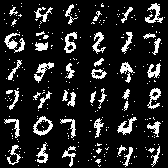

In [28]:
mosaicview(Gray.(cpu(samples_v)[:, :, rand(axes(samples_v,3), 36)]), nrow=6)'